In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("Employee Salary prediction.csv")

In [5]:
data.shape

(15000, 19)

In [6]:
data.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [7]:
data = data.drop(columns=[
    'posting_date',
    'application_deadline',
    'company_name'
])
data = data.drop(columns=['required_skills'])
data = data.drop(columns=['employee_residence'])
data = data.drop(columns=['job_description_length'])
data = data.drop(columns=['benefits_score'])
data=data.drop(columns=['job_id'])
data = data.drop(columns=['salary_currency'])

In [8]:
# Map company locations to regions
def map_company_region(country):
    asia = ['India', 'China', 'Japan', 'Singapore', 'Israel', 'South Korea']
    europe = ['Germany', 'Denmark', 'France', 'Austria', 'Sweden', 'Ireland', 'Switzerland',
              'Finland', 'Netherlands', 'United Kingdom', 'Norway']
    america = ['United States', 'Canada']
    australia = ['Australia']

    if country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in america:
        return 'America'
    elif country in australia:
        return 'Other'
    else:
        return 'Other'

# Apply the mapping
data['company_location'] = data['company_location'].apply(map_company_region)

# (Optional) Preview the result
print(data['company_location'].value_counts())


company_location
Europe     8288
Asia       4487
America    1493
Other       732
Name: count, dtype: int64


In [9]:
# map job titles to broader categories
def map_job_title(title):
    title = title.lower()
    if 'engineer' in title:
        return 'Engineer'
    elif 'scientist' in title:
        return 'Scientist'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'manager' in title or 'head' in title:
        return 'Manager'
    elif 'consultant' in title or 'specialist' in title:
        return 'Consultant'
    elif 'architect' in title:
        return 'Architect'
    elif 'research' in title:
        return 'Research'
    else:
        return 'Other'

# Apply the function and replace the original column
data['job_title'] = data['job_title'].apply(map_job_title)

# Optional: Check the value counts
print(data['job_title'].value_counts())


job_title
Engineer      6770
Scientist     2952
Manager       1508
Consultant    1432
Research       808
Architect      771
Analyst        759
Name: count, dtype: int64


In [10]:
data.shape

(15000, 10)

In [11]:

# (1) Clean column names
data.columns = data.columns.str.strip()

# (2) Define salary bins (7 bins => 8 edges)
salary_bins = [0, 70000, 100000, 140000,  240000, 420000]

# (3) Define labels for each bin (must be 7 labels)
salary_labels = [
    '0–70k',
    '70k–100k',
    '100k–140k',
    '160k–240k',
    '240k+'
]

# (4) Create the categorical column
if 'salary_usd' in data.columns:
    data['salary_range'] = pd.cut(
        data['salary_usd'],
        bins=salary_bins,
        labels=salary_labels,
        include_lowest=True
    )
    # Optional: drop the original salary column
    data.drop(columns=['salary_usd'], inplace=True)

    # (5) Display class distribution
    print(data['salary_range'].value_counts().sort_index())
else:
    print("Error: 'salary_usd' column not found.")


salary_range
0–70k        3722
70k–100k     3810
100k–140k    3348
160k–240k    3408
240k+         712
Name: count, dtype: int64


In [12]:
data = data[data['salary_range'] != '240k+']


In [13]:
import matplotlib.pyplot as plt   #visualization


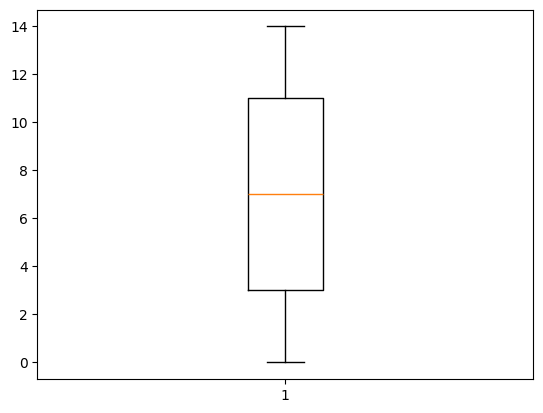

industry
11    1008
9      985
0      973
13     965
12     959
7      958
1      957
10     956
6      948
4      944
14     944
3      930
5      926
8      925
2      910
Name: count, dtype: int64


In [25]:
plt.boxplot(data['industry'])
plt.show()
print(data['industry'].value_counts())

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['job_title']=encoder.fit_transform(data['job_title'])
data['experience_level']=encoder.fit_transform(data['experience_level'])
data['company_location']=encoder.fit_transform(data['company_location'])
data['company_size']=encoder.fit_transform(data['company_size'])
data['employment_type']=encoder.fit_transform(data['employment_type'])
data['remote_ratio']=encoder.fit_transform(data['remote_ratio'])
data['education_required']=encoder.fit_transform(data['education_required'])
data['industry']=encoder.fit_transform(data['industry'])

In [26]:
data.head(5)

,job_title,experience_level,employment_type,company_location,company_size,remote_ratio,education_required,years_experience,industry,salary_range
0,6,3,0,1,1,1,1,9,0,70k–100k
1,3,0,0,0,1,2,2,1,9,0–70k
2,2,2,1,2,0,0,0,2,2,160k–240k
3,3,3,1,1,1,1,3,7,1,70k–100k
4,2,0,3,2,2,2,2,0,9,0–70k


In [28]:
x=data.drop(columns=['salary_range'])
y=data['salary_range']
x

,job_title,experience_level,employment_type,company_location,company_size,remote_ratio,education_required,years_experience,industry
0,6,3,0,1,1,1,1,9,0
1,3,0,0,0,1,2,2,1,9
2,2,2,1,2,0,0,0,2,2
3,3,3,1,1,1,1,3,7,1
4,2,0,3,2,2,2,2,0,9
...,...,...,...,...,...,...,...,...,...
14995,3,0,1,2,2,1,1,1,3
14996,5,0,0,2,1,0,2,0,6
14997,3,1,0,1,0,1,0,17,8
14998,4,0,2,2,1,0,3,1,10


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=32)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    # Only scale for models that need it
    if name in ["LogisticRegression", "SVM", "KNN"]:
        pipe = Pipeline([
            ('model', model)
        ])
    else:
        pipe = Pipeline([
            ('model', model)
        ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


C:\Users\chaitanya ajmani\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.5507
              precision    recall  f1-score   support

       0–70k       0.66      0.75      0.71       933
   100k–140k       0.40      0.33      0.36       862
   160k–240k       0.67      0.71      0.69       843
    70k–100k       0.42      0.41      0.41       934

    accuracy                           0.55      3572
   macro avg       0.54      0.55      0.54      3572
weighted avg       0.54      0.55      0.54      3572

RandomForest Accuracy: 0.5739
              precision    recall  f1-score   support

       0–70k       0.67      0.71      0.69       933
   100k–140k       0.45      0.37      0.41       862
   160k–240k       0.66      0.78      0.72       843
    70k–100k       0.46      0.44      0.45       934

    accuracy                           0.57      3572
   macro avg       0.56      0.58      0.57      3572
weighted avg       0.56      0.57      0.57      3572

KNN Accuracy: 0.5210
              precision    recall  f1-score

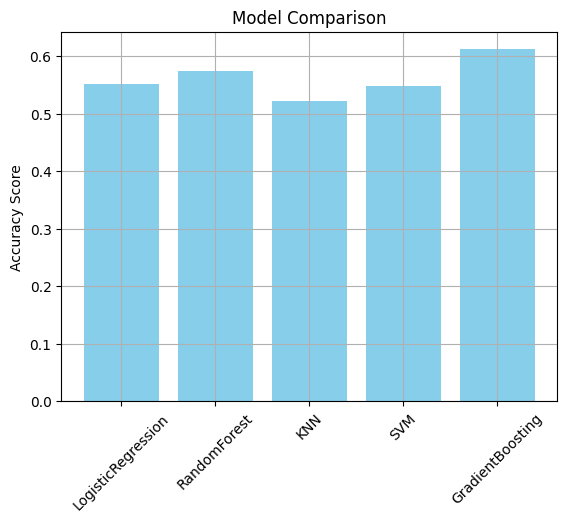

In [30]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=32)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 0.5512
RandomForest: 0.5759
KNN: 0.5210
SVM: 0.5484
GradientBoosting: 0.6114

✅ Best model: GradientBoosting with accuracy 0.6114
✅ Saved best model as best_model.pkl
